### Ophthalmic Examinations (oe.csv) - [One record per ophthalmic finding per method per location per time point per visit per subject]

This dataset contains info on visual performance, namely visual acuity results including:
- snellen equivalent score 
- number of letters correct on Sloan Eye Chart at 100%, 2.5%, and 1.25%

NOTE: optic neuritis = common visiual symptom of MS, usually occurs in 1 eye

In [89]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'oe.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
opt = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_18148\3808816465.py:17: DtypeWarning: Columns (10,12,15,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  opt = pd.read_csv(file_path)


Check how many missing values we have per column.

In [90]:
missing_percentage_opt = (opt.isnull().sum() / len(opt)) * 100
missing_opt = pd.DataFrame({'Column Name': missing_percentage_opt.index, 'Missing Percentage': missing_percentage_opt.values})
missing_opt = missing_opt.sort_values(by='Missing Percentage', ascending=False)
print(missing_opt)

   Column Name  Missing Percentage
26       OEDTC          100.000000
4      OEGRPID          100.000000
5      OELNKID          100.000000
8     OETSTDTL          100.000000
20       OEDIR          100.000000
17    OEREASND          100.000000
16      OESTAT           99.925900
22      OEBLFL           97.609686
23     OEDRVFL           95.330521
15    OESTRESU           91.226351
12    OEORRESU           91.226351
27        OEDY           64.923331
21    OEMETHOD           51.966631
10      OESCAT           51.966631
14    OESTRESN           41.041699
13    OESTRESC            0.074100
11     OEORRES            0.074100
1       DOMAIN            0.000000
18       OELOC            0.000000
19       OELAT            0.000000
9        OECAT            0.000000
7       OETEST            0.000000
6     OETESTCD            0.000000
3        OESEQ            0.000000
24    VISITNUM            0.000000
25       VISIT            0.000000
2      USUBJID            0.000000
0      STUDYID      

Remove columns with more than 90% missingness as well as redundant columns.

In [91]:
# Set the threshold for missing percentage
threshold = 90

# Filter columns based on missing percentage
columns_to_drop = missing_opt[missing_opt['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
opt = opt.drop(columns=columns_to_drop)

# Remove redundant columns
opt = opt.drop(columns=['STUDYID', 'DOMAIN', 'OETESTCD', 'OELOC', 'OECAT', 'OEORRES'])

In [92]:
opt.sort_values(by=['USUBJID', 'OESEQ'], inplace=True)
opt.head()

,USUBJID,OESEQ,OETEST,OESCAT,OESTRESC,OESTRESN,OELAT,OEMETHOD,VISITNUM,VISIT,OEDY
70049,MSOAC/0014,1,Visual Acuity Assessment,NaN,NORMAL,NaN,RIGHT,NaN,1.0,SCREENING D-28 TO -2,NaN
64159,MSOAC/0014,2,Corrected Snellen Equivalent Score,NaN,20/25,NaN,RIGHT,NaN,1.0,SCREENING D-28 TO -2,NaN
70050,MSOAC/0014,3,Visual Acuity Assessment,NaN,NORMAL,NaN,LEFT,NaN,1.0,SCREENING D-28 TO -2,NaN
65812,MSOAC/0014,4,Corrected Snellen Equivalent Score,NaN,20/30,NaN,LEFT,NaN,1.0,SCREENING D-28 TO -2,NaN
64160,MSOAC/0014,5,Corrected Snellen Equivalent Score,NaN,20/25,NaN,BILATERAL,NaN,1.0,SCREENING D-28 TO -2,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **OETESTCD**: Short Name of Measurement, Test or Exam (contains the same info as "OETEST" = Name of Measurement, Test or Exam)
- **OEORRES**: Result or finding in Original Units (contains the same info as "OESTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of OEORRES e.g. Y Yes YES used interchangeably for the same thing)
- **OELOC**: Location Used for the Measurement (redundant - always the same value: EYE)
- **OECAT**: Category (redundant - always the same value: VISUAL ACUITY)
- **OEDTC, OEGRPID, OELNKID, OETSTDTL, OEDIR, OEREASND**: all values missing and not even mentioned in the data dictionary 
- **OESTAT**: Completion Status (missing for 99.9% of observations)
- **OEBLFL**: Baseline Flag (missing for 97.6% of observations)
- **OEDRVFL**: Derived Flag (missing for 95.3% of observations)
- **OEORRESU, OESTRESU**: Original & Standard units (missing for 91.2% of observations, always equals 'm' when filled in)

In [93]:
unique_usubjid_count = opt['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 1564


**We have data on 1564 (63.4%) out of all 2465 patients for the visual tests.**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [94]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in opt.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,OESEQ,numeric
2,OETEST,categorical
3,OESCAT,categorical
4,OESTRESC,categorical
5,OESTRESN,numeric
6,OELAT,categorical
7,OEMETHOD,categorical
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [95]:
numeric_columns = ['OESEQ', 'OESTRESN', 'VISITNUM', 'OEDY']

descriptive_numeric = {
    'Count': opt[numeric_columns].count(),
    'Missing Cases': opt[numeric_columns].isna().sum(),
    'Missing %': round((opt[numeric_columns].isna().sum() / len(opt)) * 100, 2), 
    'Median': opt[numeric_columns].median(),
    'Standard Deviation': opt[numeric_columns].std()
}

num_opt = pd.DataFrame(descriptive_numeric)
num_opt

,Count,Missing Cases,Missing %,Median,Standard Deviation
OESEQ,83671,0,0.00,28.0,31.462960
OESTRESN,49331,34340,41.04,32.0,20.429742
VISITNUM,83671,0,0.00,10.3,227.145353
OEDY,29349,54322,64.92,85.0,260.390592


- OESEQ (Sequence Number)

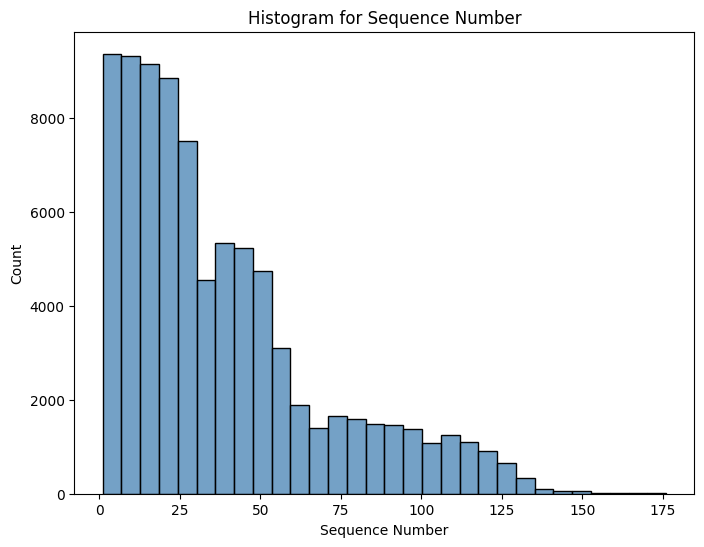

In [96]:
OESEQ = opt['OESEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(OESEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- OESTRESN (Numeric Result/Finding in Standard Units)

**NOTE:** This column gives the results for the visual tests with a numeric outcome. For this reason, we need to make a separate plot for each unique visual test name (OETEST) that has a numeric outcome. 

In [97]:
# Define the 'FTTEST' values with a numeric outcome
num_OETEST_values = [
    'Snellen Equivalent Score',
    'Decimal Score',
    'Number of Letters Correct'
]

We check how many observations each patient has for the numeric visual tests.

In [98]:
# Filter rows based on the specified values of FTTEST
filtered_rows = opt[opt['OETEST'].isin(num_OETEST_values)]

# Group by FTTEST and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['OETEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts.groupby('OETEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
OETEST,,,,,,,,
Decimal Score,310.0,18.409677,9.433633,1.0,10.0,22.0,26.0,34.0
Number of Letters Correct,1136.0,35.378521,16.484868,3.0,21.0,36.0,42.0,90.0
Snellen Equivalent Score,791.0,9.280657,3.406935,3.0,7.0,7.0,14.0,15.0


The Number of Letters Correct in the Sloan Letter Eye Chart needs to be subdivided further: 

In [99]:
# Filter rows for 'Number of Letters Correct' and specified OEMETHOD values
selected_data = filtered_rows[filtered_rows['OETEST'] == 'Number of Letters Correct']
selected_data = selected_data[selected_data['OEMETHOD'].isin(['SLOAN LETTER EYE CHART 2.5%', 'SLOAN LETTER EYE CHART 1.25%', 'SLOAN LETTER EYE CHART 100%'])]

# Group by OETEST, USUBJID, and OEMETHOD
outcome_measure_counts2 = selected_data.groupby(['OETEST', 'USUBJID', 'OEMETHOD']).size().reset_index(name='Observation_Count')

# Display the count information
outcome_measure_counts2.groupby(['OETEST', 'OEMETHOD'])['Observation_Count'].describe()

count       mean  \
OETEST                    OEMETHOD                                          
Number of Letters Correct SLOAN LETTER EYE CHART 1.25%  1135.0  11.795595   
                          SLOAN LETTER EYE CHART 100%   1136.0  11.805458   
                          SLOAN LETTER EYE CHART 2.5%   1135.0  11.798238   

                                                             std  min  25%  \
OETEST                    OEMETHOD                                           
Number of Letters Correct SLOAN LETTER EYE CHART 1.25%  5.485798  3.0  7.0   
                          SLOAN LETTER EYE CHART 100%   5.496335  3.0  7.0   
                          SLOAN LETTER EYE CHART 2.5%   5.488709  3.0  7.0   

                                                         50%   75%   max  
OETEST                    OEMETHOD                                        
Number of Letters Correct SLOAN LETTER EYE CHART 1.25%  12.0  14.0  30.0  
                          SLOAN LETTER EYE CHART 100%   12.0  14.0  30.0  
                          SLOAN LETTER EYE CHART 2.5%   12.0  14.0  30.0

The mean represents the average number of measurements for that specific test and the count is the number of patients for which we have this outcome. Remember that not all 2465 patients were present in this dataframe, but note also that none of the outcomes have been recorded for all 1564 patients in this dataframe. 

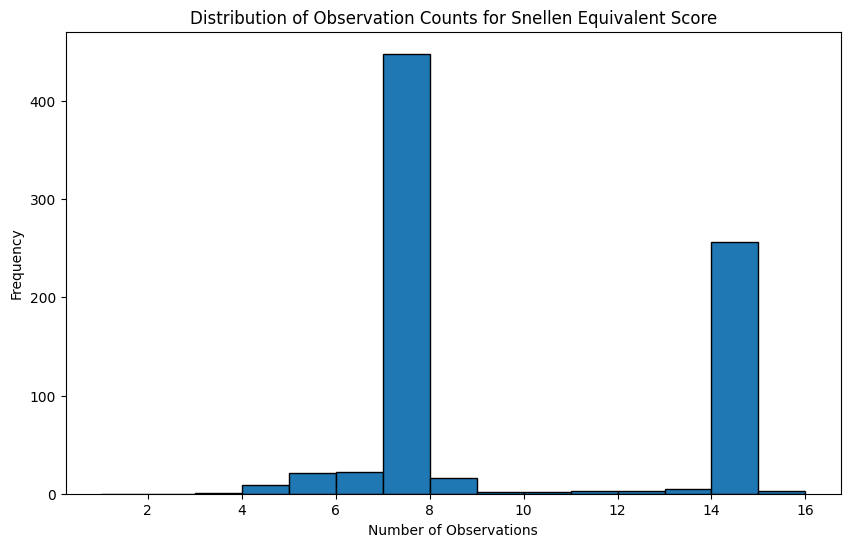

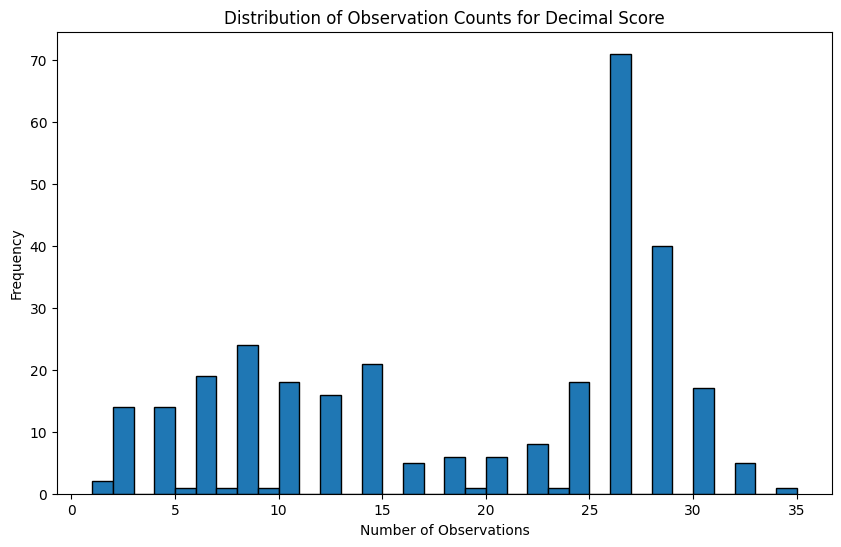

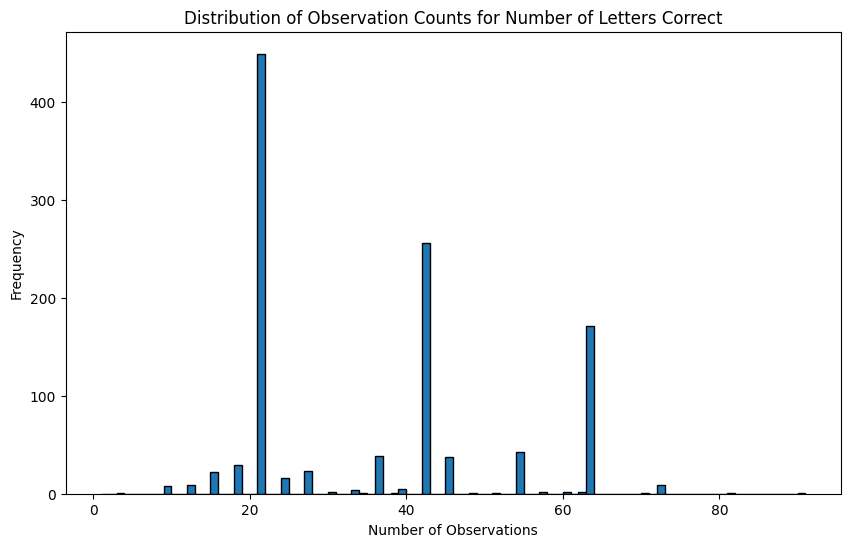

In [100]:
# Plot histograms for each OETEST value
for oetest_value in num_OETEST_values:
    data_subset = outcome_measure_counts[outcome_measure_counts['OETEST'] == oetest_value]
    
    plt.figure(figsize=(10, 6))
    plt.hist(data_subset['Observation_Count'], bins=range(1, max(data_subset['Observation_Count']) + 2), edgecolor='black')
    plt.title(f'Distribution of Observation Counts for {oetest_value}')
    plt.xlabel('Number of Observations')
    plt.ylabel('Frequency')
    plt.show()

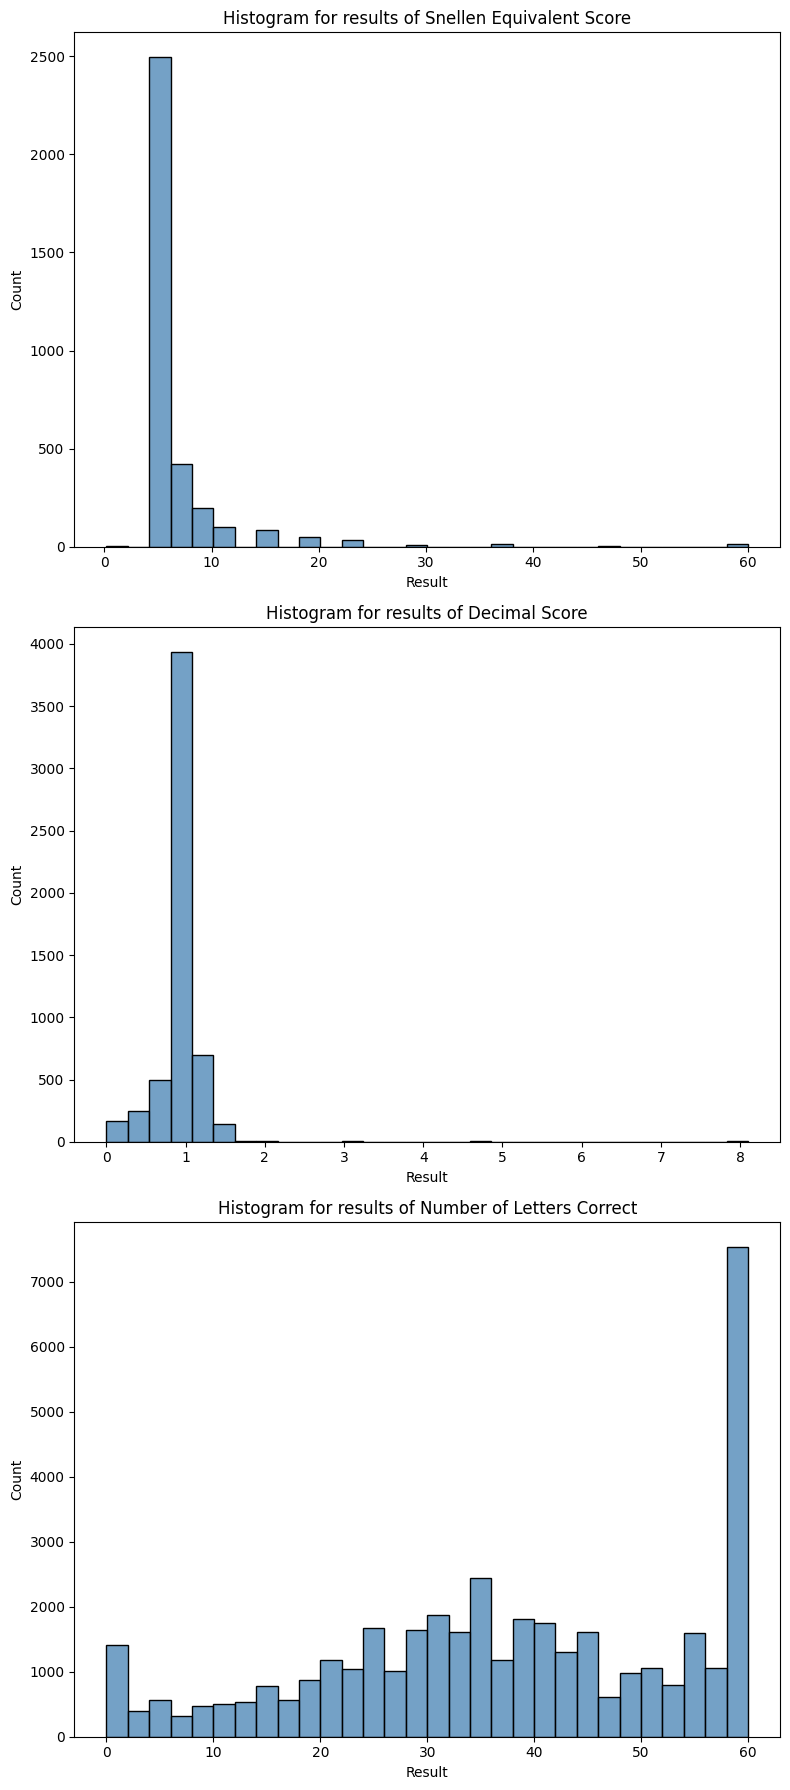

In [101]:
fig, axes = plt.subplots(nrows=len(num_OETEST_values), figsize=(8, 6 * len(num_OETEST_values)))

# Iterate over unique OETEST values
for i, oetest_value in enumerate(num_OETEST_values):
    subset_data = opt[opt['OETEST'] == oetest_value]
    
    # Create histogram for the subset
    sns.histplot(subset_data['OESTRESN'].dropna(), kde=False, color='steelblue', bins=30, ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram for results of {oetest_value}')

plt.tight_layout()
plt.show()

We can further split the number of letters correct on Sloan Letter Eye Chart in the results at 100%, 2.5%, and 1.25%.

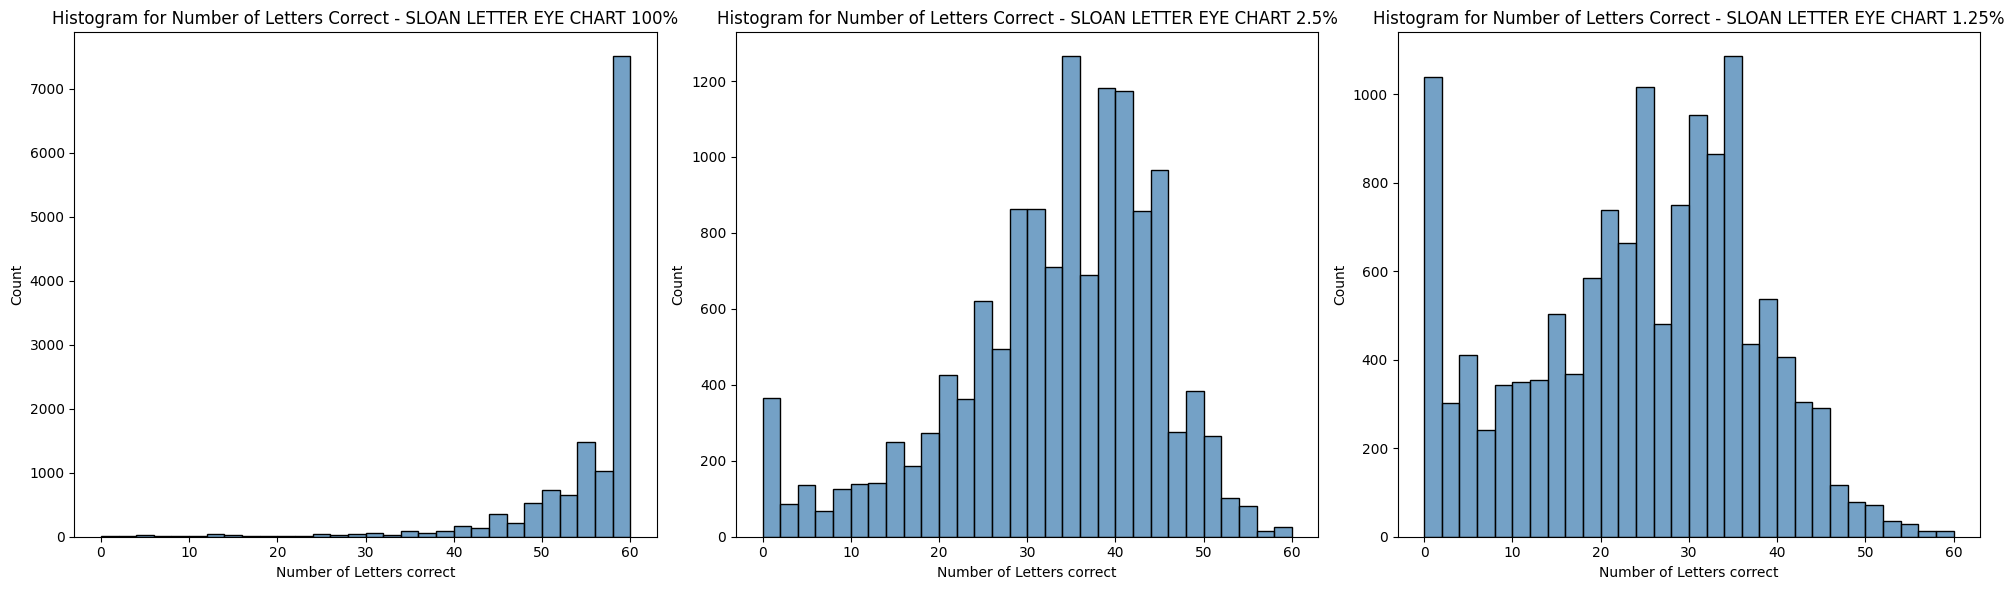

In [102]:
# Filter data for the specified OEMETHOD values 
selected_data = opt[opt['OEMETHOD'].isin(['SLOAN LETTER EYE CHART 2.5%', 'SLOAN LETTER EYE CHART 1.25%', 'SLOAN LETTER EYE CHART 100%'])]
selected_data = selected_data[selected_data['OETEST'] == 'Number of Letters Correct']

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Iterate over the unique OEMETHOD values
for i, oemethod_value in enumerate(selected_data['OEMETHOD'].unique()):
    subset_data = selected_data[selected_data['OEMETHOD'] == oemethod_value]
    
    # Create histogram for OESTRESN
    sns.histplot(subset_data['OESTRESN'].dropna(), kde=False, color='steelblue', bins=30, ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Number of Letters correct')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram for Number of Letters Correct - {oemethod_value}')

plt.tight_layout()
plt.show()

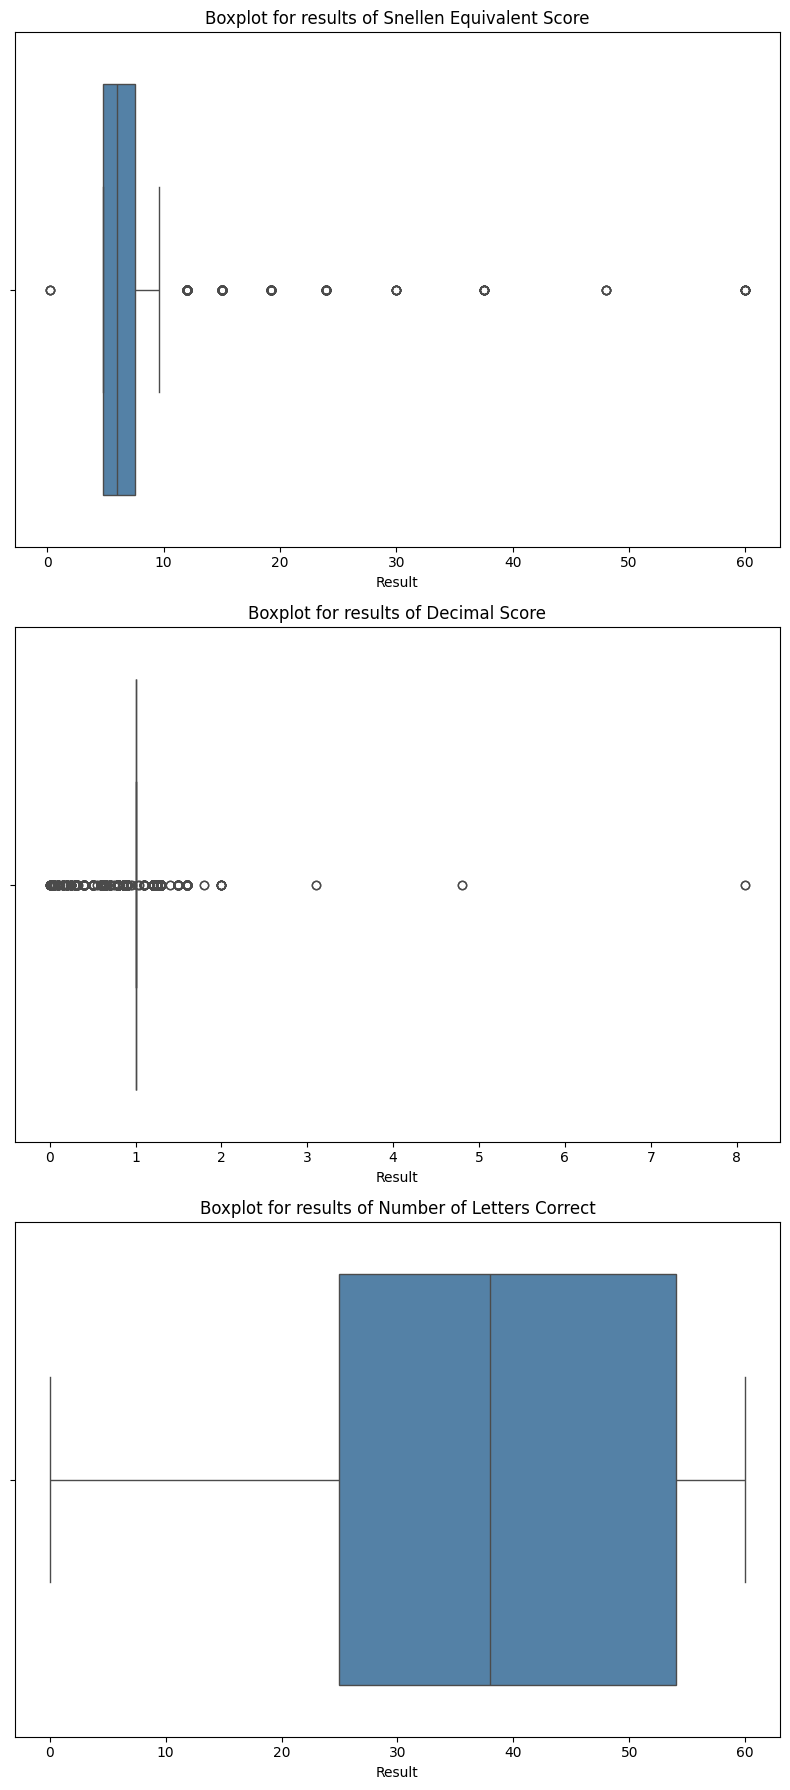

In [103]:
fig, axes = plt.subplots(nrows=len(num_OETEST_values), figsize=(8, 6 * len(num_OETEST_values)))

# Iterate over unique OETEST values
for i, oetest_value in enumerate(num_OETEST_values):
    subset_data = opt[opt['OETEST'] == oetest_value]
    
    # Create horizontal boxplot for the subset
    sns.boxplot(x=subset_data['OESTRESN'].dropna(), color='steelblue', ax=axes[i])
    
    # Customize subplot
    axes[i].set_xlabel('Result')
    axes[i].set_title(f'Boxplot for results of {oetest_value}')

plt.tight_layout()
plt.show()

We make the same split again for the Sloan Letter Eye Chart:

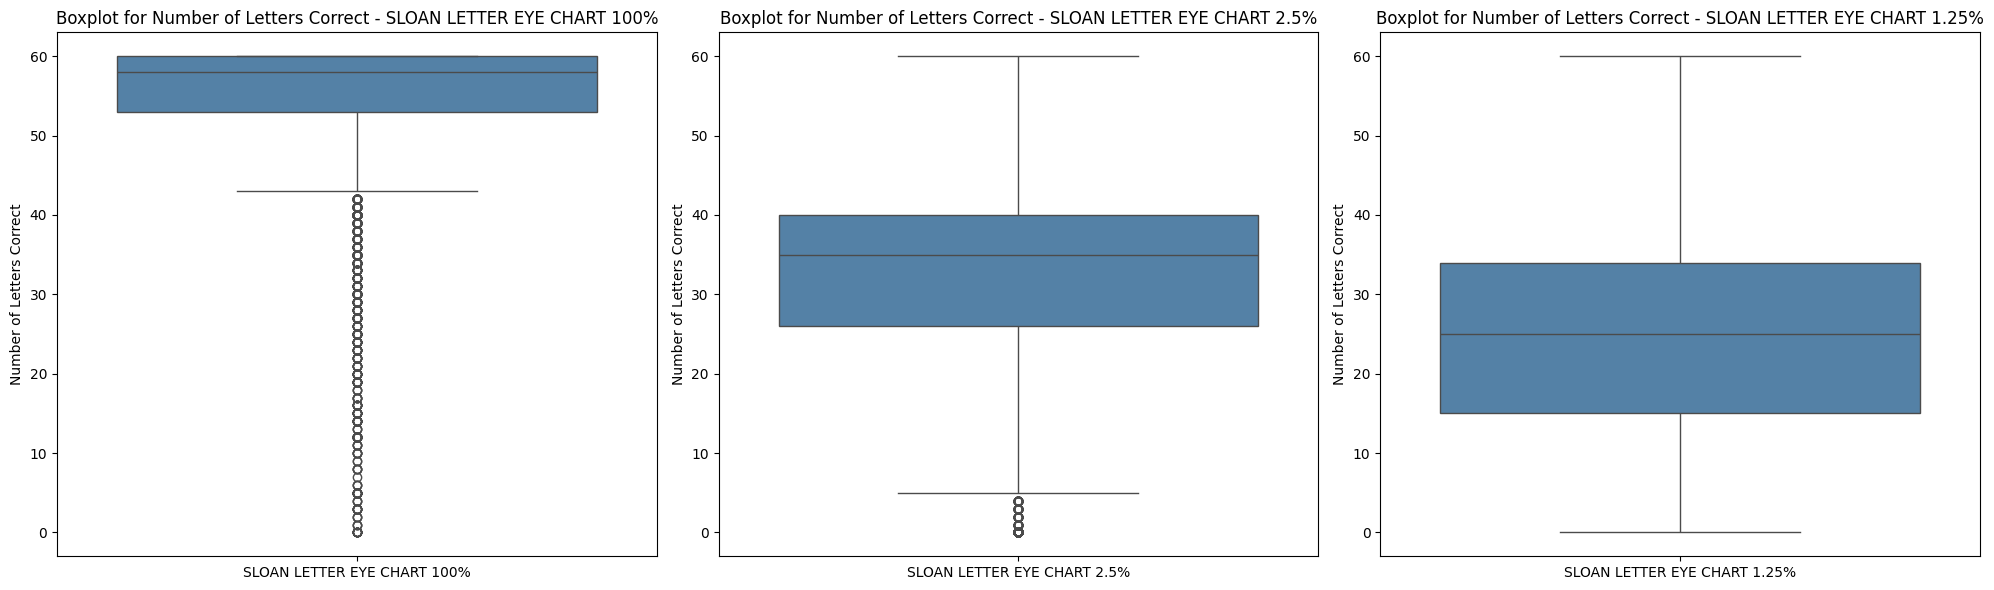

In [104]:
# Filter data for the specified OEMETHOD values and OETEST
selected_data = opt[opt['OEMETHOD'].isin(['SLOAN LETTER EYE CHART 2.5%', 'SLOAN LETTER EYE CHART 1.25%', 'SLOAN LETTER EYE CHART 100%'])]
selected_data = selected_data[selected_data['OETEST'] == 'Number of Letters Correct']

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Iterate over the unique OEMETHOD values
for i, oemethod_value in enumerate(selected_data['OEMETHOD'].unique()):
    subset_data = selected_data[selected_data['OEMETHOD'] == oemethod_value]
    
    # Create boxplot for OESTRESN
    sns.boxplot(x='OEMETHOD', y='OESTRESN', data=subset_data, ax=axes[i], color='steelblue')
    
    # Customize subplot
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Number of Letters Correct')
    axes[i].set_title(f'Boxplot for Number of Letters Correct - {oemethod_value}')

plt.tight_layout()
plt.show()

- VISITNUM (Visit Number)

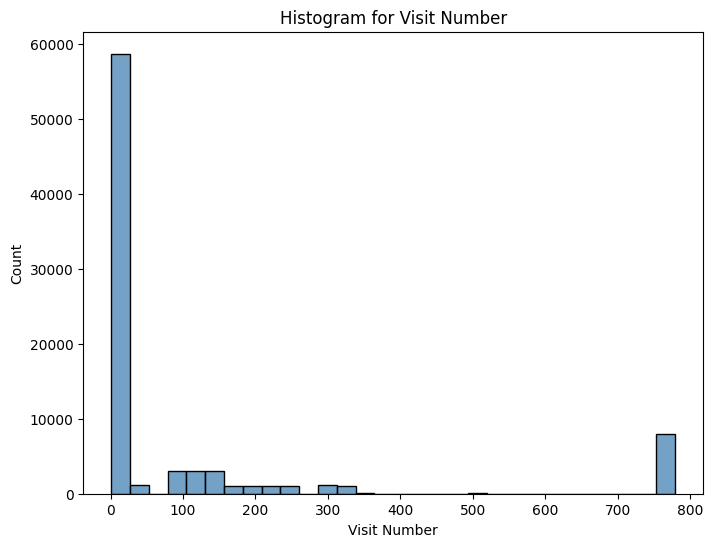

In [105]:
VISITNUM_opt = opt['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_opt, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- OEDY (Study Day of Collection)

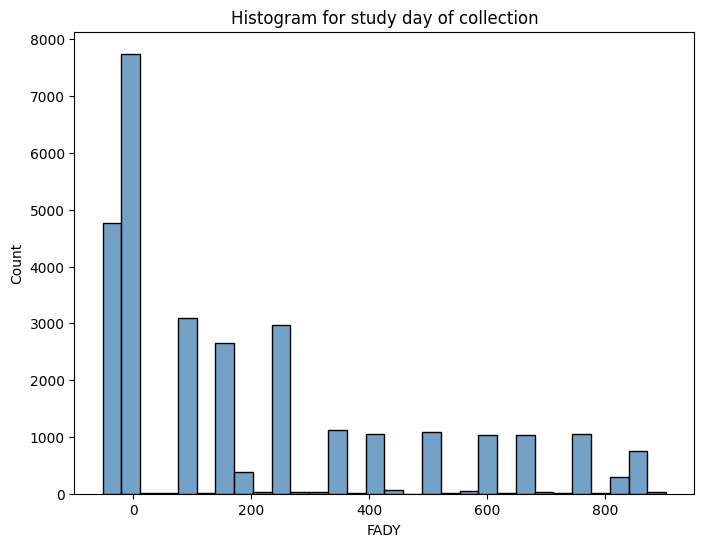

In [106]:
OEDY = opt['OEDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(OEDY, kde=False, color='steelblue', bins=30)
plt.xlabel('FADY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [107]:
OEDY.describe()

count    29349.000000
mean       198.862789
std        260.390592
min        -52.000000
25%        -11.000000
50%         85.000000
75%        337.000000
max        904.000000
Name: OEDY, dtype: float64

In [108]:
unique_OEDY_values_count = opt['OEDY'].nunique()
unique_OEDY_values_count

313

313 unique values of study day of collection

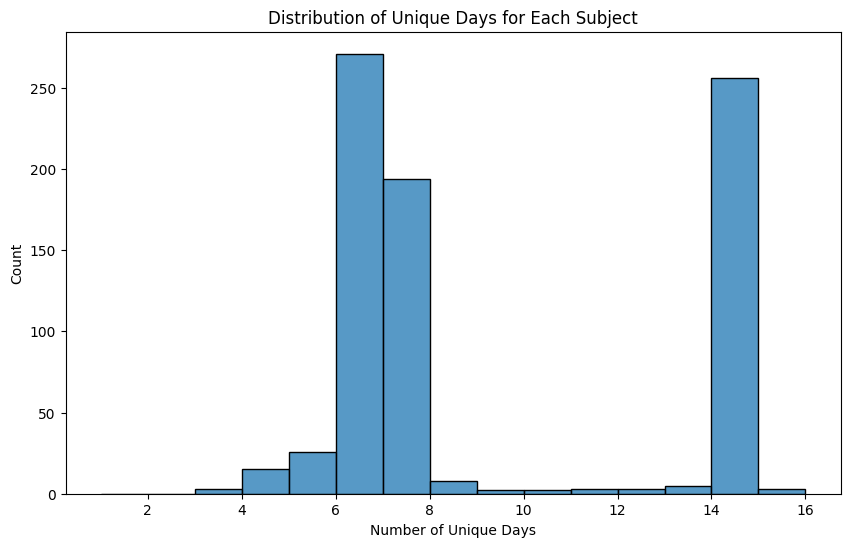

In [109]:
subject_days_count = opt.groupby('USUBJID')['OEDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

In [110]:
subject_days_count.describe()

count    1564.000000
mean        4.506394
std         5.170351
min         0.000000
25%         0.000000
50%         4.000000
75%         7.000000
max        15.000000
Name: OEDY, dtype: float64

Distribution of length of follow-up

Number of unique values in the 'Difference' column: 156


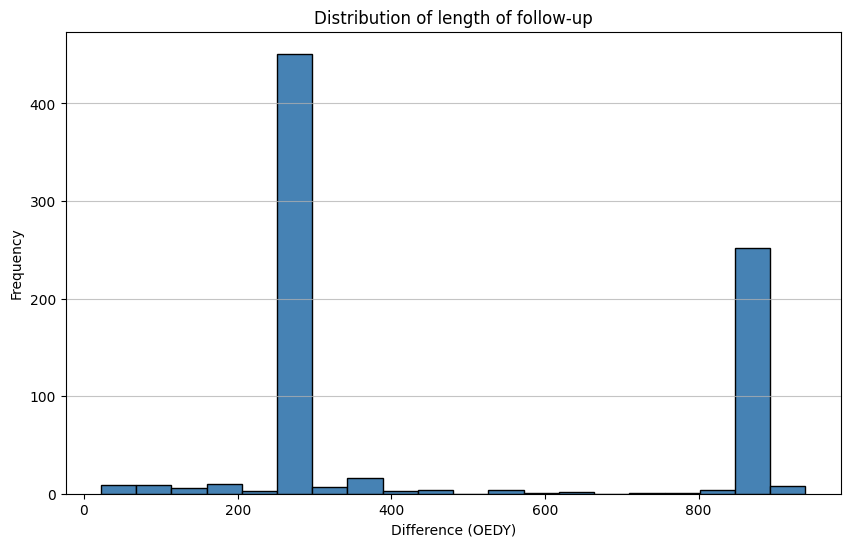

In [111]:
#Calculate the maximum and minimum values of OEDY for each unique patient ID
opt_max_min = opt.groupby('USUBJID')['OEDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
opt_max_min['Difference'] = opt_max_min['max'] - opt_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = opt_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(opt_max_min['Difference'], bins=20, color='steelblue', edgecolor='black')
plt.title('Distribution of length of follow-up')
plt.xlabel('Difference (OEDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Descriptive statistics for categorical variables

In [112]:
categorical_columns = ['OETEST', 'OESCAT', 'OESTRESC', 'OELAT', 'OEMETHOD', 'VISIT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': opt[col].count(),
        'Missing Cases': opt[col].isna().sum(),
        'Missing %': round((opt[col].isna().sum() / len(opt)) * 100, 2),
        'Unique Values': opt[col].nunique(),
        'Mode': opt[col].mode().values[0],
        'Mode Frequency': opt[col].value_counts().max()
    }

cat_opt = pd.DataFrame(descriptive_categorical).T
cat_opt

,Count,Missing Cases,Missing %,Unique Values,Mode,Mode Frequency
OETEST,83671,0,0.0,6,Number of Letters Correct,40190
OESCAT,40190,43481,51.97,2,LOW CONTRAST,26779
OESTRESC,83609,62,0.07,201,NORMAL,13560
OELAT,83671,0,0.0,3,BILATERAL,37441
OEMETHOD,40190,43481,51.97,3,SLOAN LETTER EYE CHART 100%,13411
VISIT,83671,0,0.0,122,SCREENING,5898


- Number of observations for each OETEST (Name of Measurement, Test or Examination) category

In [113]:
OETEST_counts = opt['OETEST'].value_counts().reset_index()
OETEST_counts.columns = ['OETEST', 'Count']
OETEST_counts

,OETEST,Count
0,Number of Letters Correct,40190
1,Corrected Snellen Equivalent Score,15299
2,Visual Acuity Assessment,15064
3,Snellen Equivalent Score,7341
4,Decimal Score,5707
5,Low Vision Test,70


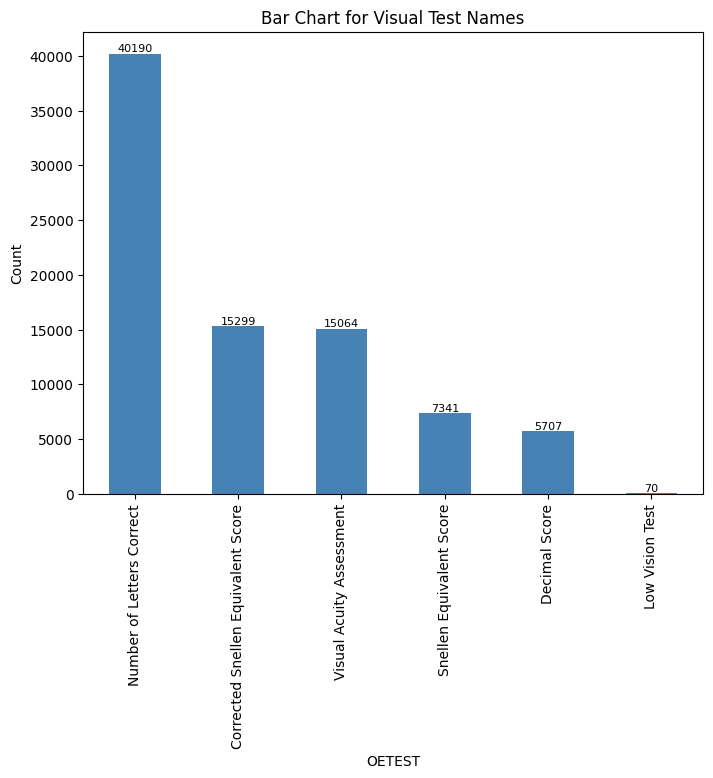

In [114]:
plt.figure(figsize=(8, 6))
ax = opt['OETEST'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('OETEST')
plt.ylabel('Count')
plt.title('Bar Chart for Visual Test Names')
plt.show()

- Number of observations for each OESCAT (subcategory of visual acuity which is the main category for every observation) category

In [115]:
OESCAT_counts = opt['OESCAT'].value_counts().reset_index()
OESCAT_counts.columns = ['OESCAT', 'Count']
OESCAT_counts

,OESCAT,Count
0,LOW CONTRAST,26779
1,HIGH CONTRAST,13411


In [116]:
# Create a cross-tabulation for OESCAT and OEMETHOD
cross_table = pd.crosstab(index=opt['OESCAT'], columns=opt['OEMETHOD'])
cross_table

OEMETHOD,SLOAN LETTER EYE CHART 1.25%,SLOAN LETTER EYE CHART 100%,SLOAN LETTER EYE CHART 2.5%
OESCAT,,,
HIGH CONTRAST,0,13411,0
LOW CONTRAST,13388,0,13391


- Number of observations for each OESTRESC (Result/Finding in Std Format) category

**NOTE:** This column gives the results for visual tests with both a numeric and categorical outcome. However, the numeric values are not formatted in a standardized way, only the categorical ones are. Since we already looked at the numeric outcomes in OESTRESN, we will focus only on the categorical outcomes for this variable.

In [117]:
OESTRESC_counts = opt['OESTRESC'].value_counts().reset_index()
OESTRESC_counts.columns = ['OESTRESC', 'Count']
OESTRESC_counts
# contains both yes/no and numbers, should be looked at together with FTTEST!

,OESTRESC,Count
0,NORMAL,13560
1,20/20,5059
2,60,4700
3,20/16,4495
4,1,3807
...,...,...
196,15/10,1
197,0.29,1
198,0.18,1
199,20/22,1


In [118]:
# Define the 'OETEST' values with a categorical outcome
cat_OETEST_values = [
    'Corrected Snellen Equivalent Score',
    'Low Vision Test',
    'Visual Acuity Assessment'
]

In [119]:
# Filter the DataFrame based on cat_OETEST_values
filtered_opt = opt[opt['OETEST'].isin(cat_OETEST_values)]

# Create a cross-tabulation for counts
counts_table = pd.crosstab(index=filtered_opt['OETEST'], columns=filtered_opt['OESTRESC'], margins=True, margins_name='Total')
counts_table

OESTRESC,1/1,1/20,1/6,10/10,10/100,10/20,12/10,12/20,13/10,15/10,...,6/8,6/9,7/10,8/10,9/10,ABNORMAL,COUNT FINGERS,HAND MOVEMENT,NORMAL,Total
OETEST,,,,,,,,,,,,,,,,,,,,,
Corrected Snellen Equivalent Score,3,1,1,642,1,3,28,1,2,1,...,3,74,37,69,52,0,0,0,0,15299
Low Vision Test,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,65,5,0,70
Visual Acuity Assessment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1442,0,0,13560,15002
Total,3,1,1,642,1,3,28,1,2,1,...,3,74,37,69,52,1442,65,5,13560,30371


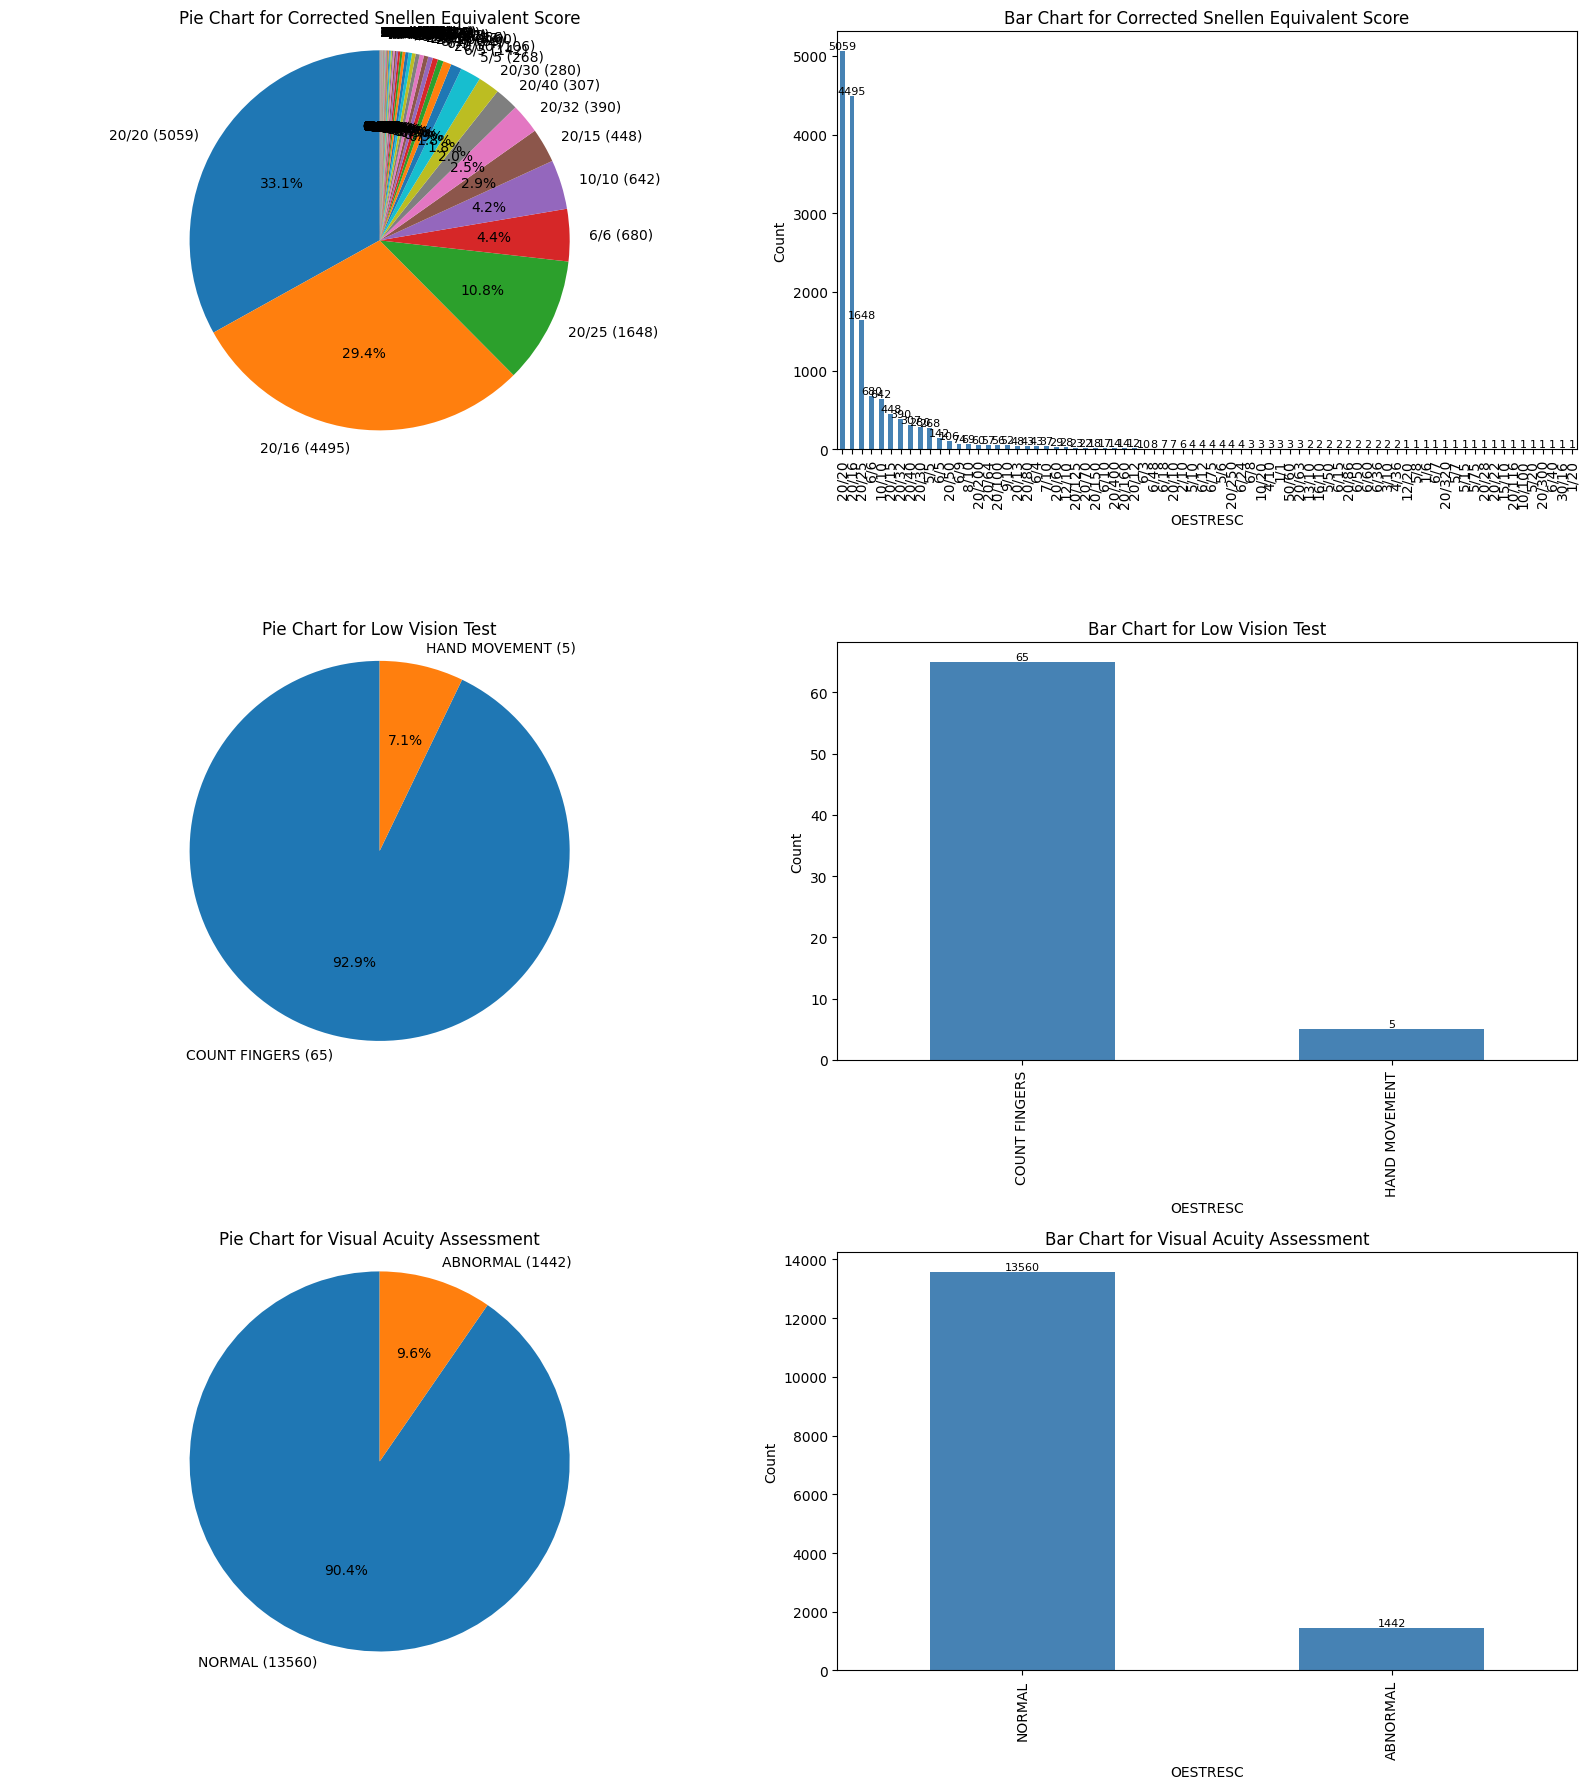

In [120]:
fig, axes = plt.subplots(nrows=len(cat_OETEST_values), ncols=2, figsize=(16, 6 * len(cat_OETEST_values)))

# Iterate over categorical OETEST values
for i, oetest_value in enumerate(cat_OETEST_values):
    subset_data_oetest = opt[opt['OETEST'] == oetest_value] 
    
    # Pie chart for OESTRESC
    category_counts_oestresc = subset_data_oetest['OESTRESC'].value_counts()
    if not category_counts_oestresc.empty:
        percentages = category_counts_oestresc / category_counts_oestresc.sum() * 100
        labels = [f"{category} ({count})" for category, count in zip(category_counts_oestresc.index, category_counts_oestresc)]
        
        axes[i, 0].pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
        axes[i, 0].axis('equal')
        axes[i, 0].set_title(f'Pie Chart for {oetest_value}')

    # Bar chart for OESTRESC
    if not subset_data_oetest['OESTRESC'].empty:
        ax = subset_data_oetest['OESTRESC'].value_counts().plot(kind='bar', color='steelblue', ax=axes[i, 1])
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)
        axes[i, 1].set_xlabel('OESTRESC')
        axes[i, 1].set_ylabel('Count')
        axes[i, 1].set_title(f'Bar Chart for {oetest_value}')

plt.tight_layout()
plt.show()

- Number of observations for each OELAT (Laterality) category

In [121]:
OELAT_counts = opt['OELAT'].value_counts().reset_index()
OELAT_counts.columns = ['OELAT', 'Count']
OELAT_counts

,OELAT,Count
0,BILATERAL,37441
1,RIGHT,23125
2,LEFT,23105


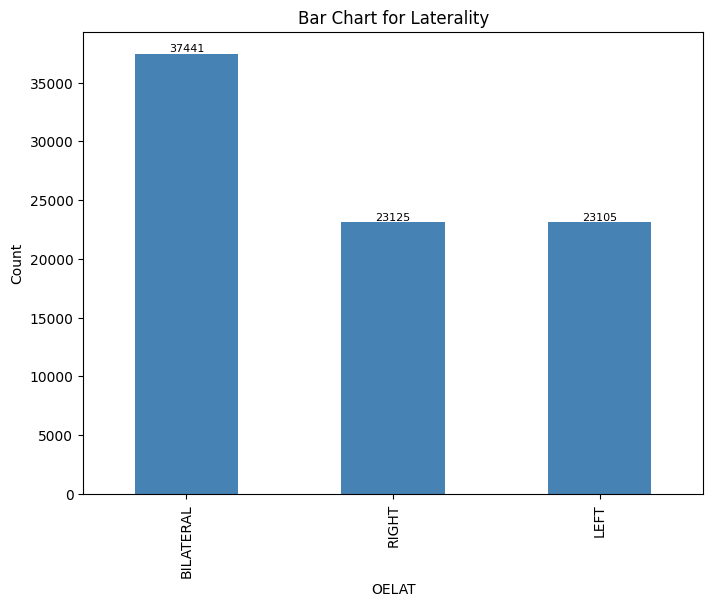

In [122]:
plt.figure(figsize=(8, 6))
ax = opt['OELAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('OELAT')
plt.ylabel('Count')
plt.title('Bar Chart for Laterality')
plt.show()

In [123]:
# Create a cross-tabulation for OELAT and OETEST
cross_table = pd.crosstab(index=opt['OELAT'], columns=opt['OETEST'])
cross_table

OETEST,Corrected Snellen Equivalent Score,Decimal Score,Low Vision Test,Number of Letters Correct,Snellen Equivalent Score,Visual Acuity Assessment
OELAT,,,,,,
BILATERAL,2025,0,0,28075,7341,0
LEFT,6628,2848,48,6049,0,7532
RIGHT,6646,2859,22,6066,0,7532


- Number of observations for each OEMETHOD (Method of Test or Examination) category

In [124]:
OEMETHOD_counts = opt['OEMETHOD'].value_counts().reset_index()
OEMETHOD_counts.columns = ['OEMETHOD', 'Count']
OEMETHOD_counts

,OEMETHOD,Count
0,SLOAN LETTER EYE CHART 100%,13411
1,SLOAN LETTER EYE CHART 2.5%,13391
2,SLOAN LETTER EYE CHART 1.25%,13388


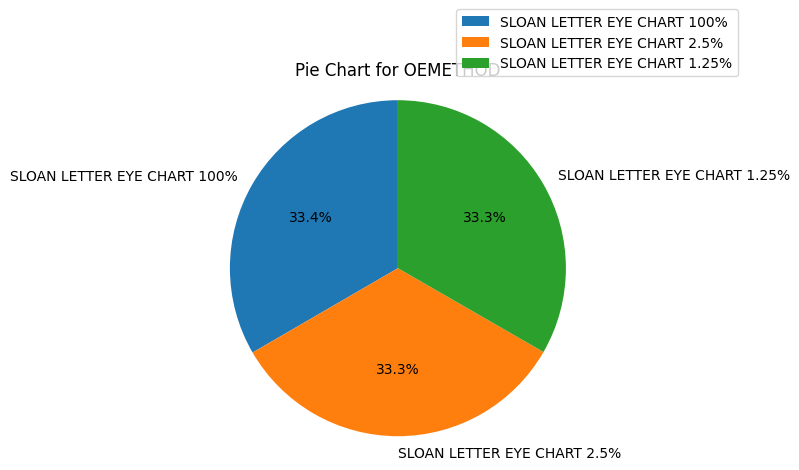

In [125]:
categories_oemethod = opt['OEMETHOD'].dropna().unique()
category_counts_oemethod = opt['OEMETHOD'].dropna().value_counts()

plt.pie(category_counts_oemethod, labels=categories_oemethod, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories_oemethod, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.title('Pie Chart for OEMETHOD')
plt.show()

- Number of observations for each VISIT (Visit Name) category 

In [126]:
VISIT_counts = opt['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,SCREENING,5898
1,SCREENING D-28 TO -2,5382
2,MONTH 1,5081
3,MONTH 3,4993
4,MONTH 6,4675
...,...,...
117,VISIT6 - UNSCHEDULED 04,4
118,VISIT6 - UNSCHEDULED 05,4
119,VISIT6 - UNSCHEDULED 06,4
120,MONTH 3 - UNSCHEDULED 03,4


### Create a static dataframe

In [127]:
OEDY.describe()

count    29349.000000
mean       198.862789
std        260.390592
min        -52.000000
25%        -11.000000
50%         85.000000
75%        337.000000
max        904.000000
Name: OEDY, dtype: float64

In [128]:
# Calculate the percentage of missing values for the 'OEDY' column for each outcome (each value in 'OETEST') 
missing_percentages = opt.groupby('OETEST')['OEDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome:
OETEST
Corrected Snellen Equivalent Score    100.00
Decimal Score                         100.00
Low Vision Test                       100.00
Number of Letters Correct              45.24
Snellen Equivalent Score                0.00
Visual Acuity Assessment              100.00
Name: OEDY, dtype: float64


#### Snellen Equivalent Score (SES)

In [129]:
# Filter rows where OETEST is 'Snellen Equivalent Score'
filtered_rows = opt[opt['OETEST'] == 'Snellen Equivalent Score']

# Check the number of unique OEDY values
unique_oedy_values = filtered_rows['OEDY'].nunique()
print("Number of unique OEDY values when OETEST is 'Snellen Equivalent Score':", unique_oedy_values)


Number of unique OEDY values when OETEST is 'Snellen Equivalent Score': 313


hoped this would be a lot lower than 313, if it was like <15 I could've just stored the measurements in separate columns for each patients 

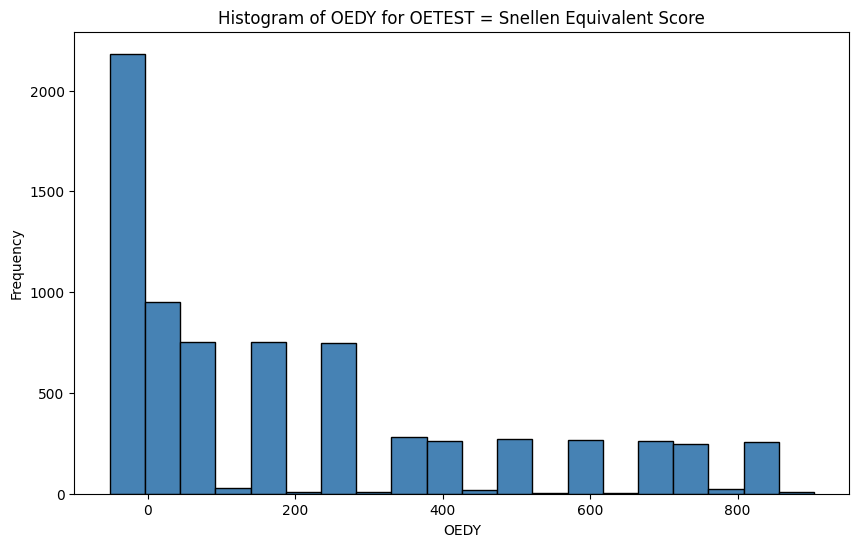

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_rows['OEDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('OEDY')
plt.ylabel('Frequency')
plt.title('Histogram of OEDY for OETEST = Snellen Equivalent Score')
plt.show()

In [131]:
# Calculate the median of OEDY
median_oedy = filtered_rows['OEDY'].median()
print("Median of OEDY for OETEST = 'Snellen Equivalent Score':", median_oedy)

Median of OEDY for OETEST = 'Snellen Equivalent Score': 85.0


Divide into different time periods to track the evolution over time. 

**How to choose time periods? For now take before and after median value of OETEST because tried 'before' '1 yr' and '3 yrs' but mean nr of obs is 3, 4, 6 (not a lot) and last period only has 280 instead of 791 patients**

**Overall mean of 9 obs per patient for this outcome - so maybe not even split into time periods?**

In [132]:
# Create subsets for different time periods
before_study_start = opt[opt['OEDY'] < 1]
after_study_start = opt[opt['OEDY'] >= 1]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['OETEST'] == 'Snellen Equivalent Score']
    outcome_measure_counts = filtered_rows.groupby(['OETEST', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('OETEST')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')


Before Study Start


,count,mean,std,min,25%,50%,75%,max
OETEST,,,,,,,,
Snellen Equivalent Score,791.0,2.974716,0.250302,1.0,3.0,3.0,3.0,4.0


In [133]:
count_observations(after_study_start, 'After Study Start')


After Study Start


,count,mean,std,min,25%,50%,75%,max
OETEST,,,,,,,,
Snellen Equivalent Score,791.0,6.305942,3.381252,1.0,4.0,4.0,11.0,12.0


In [135]:
SES_df = opt[opt['OETEST'] == 'Snellen Equivalent Score'].copy()  # Create a copy to avoid the warning

conditions = [
    (SES_df['OEDY'] < 1),
    (SES_df['OEDY'] >= 1)
]

# Define corresponding values for each condition
values = ['before', 'after']

# Create the new column "FT_PERIOD"
SES_df['OE_PERIOD'] = np.select(conditions, values, default='NaN')
SES_df.head(12)

,USUBJID,OESEQ,OETEST,OESCAT,OESTRESC,OESTRESN,OELAT,OEMETHOD,VISITNUM,VISIT,OEDY,OE_PERIOD
40543,MSOAC/0030,7,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-33.0,before
40544,MSOAC/0030,8,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-33.0,before
40545,MSOAC/0030,12,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-19.0,before
40546,MSOAC/0030,16,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,20.0,DAY 1,1.0,after
40547,MSOAC/0030,20,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,90.0,WEEK 12,85.0,after
40548,MSOAC/0030,24,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,120.0,WEEK 24,171.0,after
42044,MSOAC/0030,28,Snellen Equivalent Score,NaN,6,6.0,BILATERAL,NaN,140.0,WEEK 36,253.0,after
45932,MSOAC/0031,4,Snellen Equivalent Score,NaN,6/6,NaN,BILATERAL,NaN,20.0,BASELINE WEEK 0,1.0,after
46462,MSOAC/0031,8,Snellen Equivalent Score,NaN,6/7.5,NaN,BILATERAL,NaN,10.1,SCREENING1,-28.0,before
45933,MSOAC/0031,12,Snellen Equivalent Score,NaN,6/6,NaN,BILATERAL,NaN,10.2,SCREENING2,-14.0,before


In [136]:
unique_values = SES_df['OESTRESC'].unique()
print(unique_values)

['4.8' '6' '6/6' '6/7.5' '6/4.8' '9.6' '7.5' '12' '6/48' '15' '0.2' '24'
 '6/12' '6/9.6' '37.5' '19.2' '6/24' '6/19.2' '6/37.5' '6/15' '6/30' '60'
 '48' '6/60' '30' '6/6.0']


It appears that there is an inconsistent way of recording the SES, the numerator of 6 is often discarded. Let's make sure all measurements are recorded in the same way;
EITHER THE NUMERATOR SHOULD HAVE BEEN 6 EVERYWHERE or no numerator means 20 because this is the "standard" according to internet

In [137]:
# Function to fill missing values in OESTRESN based on OESTRESC
def fill_missing_oestresn(row):
    if pd.isna(row['OESTRESN']):
        # Extract the second number after "6/"
        oestresc_values = str(row['OESTRESC']).split('/')
        if len(oestresc_values) == 2:
            second_number = oestresc_values[1].strip()
            try:
                # Try converting the second number to float
                return float(second_number)
            except ValueError:
                # Handle the case where conversion to float fails
                return None
    return row['OESTRESN']

# Apply the function to fill missing values in OESTRESN
SES_df['OESTRESN'] = SES_df.apply(fill_missing_oestresn, axis=1)
SES_df.head(12)

,USUBJID,OESEQ,OETEST,OESCAT,OESTRESC,OESTRESN,OELAT,OEMETHOD,VISITNUM,VISIT,OEDY,OE_PERIOD
40543,MSOAC/0030,7,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-33.0,before
40544,MSOAC/0030,8,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-33.0,before
40545,MSOAC/0030,12,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,10.0,SCREENING,-19.0,before
40546,MSOAC/0030,16,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,20.0,DAY 1,1.0,after
40547,MSOAC/0030,20,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,90.0,WEEK 12,85.0,after
40548,MSOAC/0030,24,Snellen Equivalent Score,NaN,4.8,4.8,BILATERAL,NaN,120.0,WEEK 24,171.0,after
42044,MSOAC/0030,28,Snellen Equivalent Score,NaN,6,6.0,BILATERAL,NaN,140.0,WEEK 36,253.0,after
45932,MSOAC/0031,4,Snellen Equivalent Score,NaN,6/6,6.0,BILATERAL,NaN,20.0,BASELINE WEEK 0,1.0,after
46462,MSOAC/0031,8,Snellen Equivalent Score,NaN,6/7.5,7.5,BILATERAL,NaN,10.1,SCREENING1,-28.0,before
45933,MSOAC/0031,12,Snellen Equivalent Score,NaN,6/6,6.0,BILATERAL,NaN,10.2,SCREENING2,-14.0,before


Check how fast this score changes over time to see what would be good time bins

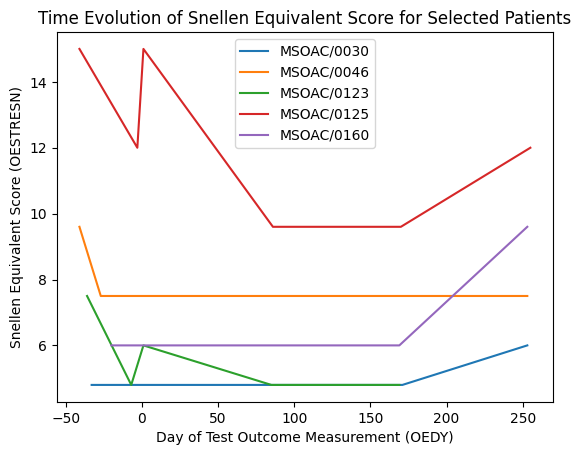

In [155]:
# Select a few patients (replace 'selected_patients' with the actual USUBJID values you are interested in)
selected_patients = ['MSOAC/0030', 'MSOAC/0046', 'MSOAC/0123', 'MSOAC/0125', 'MSOAC/0160']
filtered_opt = SES_df[(SES_df['USUBJID'].isin(selected_patients))]

# Plot the time evolution for selected patients
for patient_id in selected_patients:
    patient_data = filtered_opt[filtered_opt['USUBJID'] == patient_id]
    plt.plot(patient_data['OEDY'], patient_data['OESTRESN'])

# Customize the plot
plt.xlabel('Day of Test Outcome Measurement (OEDY)')
plt.ylabel('Snellen Equivalent Score (OESTRESN)')
plt.title('Time Evolution of Snellen Equivalent Score for Selected Patients')
plt.legend(selected_patients)
plt.show()

NOTE: A higher denominator (the number of SES we kept) indicates worse visual performance, so we will calculate the maximuum
NOTE: this is always a bilateral measurement (see earlier in the notebook when looking at OELAT) 

In [154]:
grouped_df = SES_df.pivot_table(values='OESTRESN', index='USUBJID', columns='OE_PERIOD', aggfunc='max', fill_value=None).reset_index()

# Rename the columns as SES_1 and SES_2
grouped_df.columns = ['USUBJID', 'SES_after', 'SES_before']

# Merge the new DataFrame with the original DataFrame on 'USUBJID'
result_SES = pd.merge(SES_df[['USUBJID']], grouped_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_SES = result_SES.drop_duplicates(subset=['USUBJID'])
result_SES.head(20)

,USUBJID,SES_after,SES_before
0,MSOAC/0030,6.0,4.8
7,MSOAC/0031,6.0,7.5
21,MSOAC/0046,7.5,9.6
28,MSOAC/0050,4.8,4.8
42,MSOAC/0060,6.0,6.0
49,MSOAC/0063,6.0,6.0
54,MSOAC/0065,6.0,6.0
61,MSOAC/0070,7.5,6.0
72,MSOAC/0073,7.5,7.5
79,MSOAC/0080,12.0,12.0


#### Decimal Score

NOTE: no time information of Decimal Score (OEDY always missing)

In [139]:
DC_rows = opt[opt['OETEST'] == 'Decimal Score']

outcome_measure_counts = DC_rows.groupby(['OETEST', 'USUBJID', 'OELAT']).size().reset_index(name='Observation_Count')
outcome_measure_counts.groupby(['OETEST', 'OELAT'])['Observation_Count'].describe()

count      mean       std  min  25%   50%   75%   max
OETEST        OELAT                                                       
Decimal Score LEFT   308.0  9.246753  4.687375  1.0  5.0  11.0  13.0  17.0
              RIGHT  309.0  9.252427  4.692599  1.0  5.0  11.0  13.0  17.0

In [140]:
result_DC = DC_rows.pivot_table(index='USUBJID', columns='OELAT', values='OESTRESN', aggfunc='min').reset_index()

# Rename the columns
result_DC.columns = ['USUBJID', 'DS_Left', 'DS_Right']

# Create a new column 'DS' with the minimum value between DS_L and DS_R
result_DC['DS'] = result_DC[['DS_Left', 'DS_Right']].min(axis=1)

# Update DS_L and DS_R based on the conditions
result_DC['DS_L'] = np.where(result_DC['DS_Left'] <= result_DC['DS_Right'], 1, 0)
result_DC['DS_R'] = np.where(result_DC['DS_Right'] <= result_DC['DS_Left'], 1, 0)

# Drop DS_Left and DS_Right columns
result_DC = result_DC.drop(['DS_Left', 'DS_Right'], axis=1)

result_DC.head(15)

,USUBJID,DS,DS_L,DS_R
0,MSOAC/0044,1.00,1,1
1,MSOAC/0051,0.15,1,1
2,MSOAC/0067,0.66,1,1
3,MSOAC/0093,0.90,1,1
4,MSOAC/0119,0.90,1,1
5,MSOAC/0165,1.00,1,1
6,MSOAC/0212,0.00,1,1
7,MSOAC/0241,1.00,1,1
8,MSOAC/0288,1.00,1,1
9,MSOAC/0315,1.00,1,1


In [141]:
# Count the number of rows where DS_L and DS_R are different
different_count = (result_DC['DS_L'] != result_DC['DS_R']).sum()

print("Number of rows where DS_L and DS_R are different:", different_count)

Number of rows where DS_L and DS_R are different: 129


For now not using a binary indicator here to say R or L eye because only for 2/3rd of these the eyes are both having the same so I would have 1 1 as indicator for most of the cases - still need to put DS_L & DS_R together

#### Number of Letters Correct on Sloan Eye Chart (1.25%!)

ONLY look at 1.25% bc we saw from the boxplots/histograms that this one is the worst one/most difficult one

In [142]:
SLEC_rows = opt[(opt['OETEST'] == 'Number of Letters Correct') & (opt['OEMETHOD'] == 'SLOAN LETTER EYE CHART 1.25%')].copy()

outcome_measure_counts = SLEC_rows.groupby(['OETEST', 'USUBJID', 'OELAT']).size().reset_index(name='Observation_Count')
outcome_measure_counts.groupby(['OETEST', 'OELAT'])['Observation_Count'].describe()

count      mean       std  min  25%  \
OETEST                    OELAT                                             
Number of Letters Correct BILATERAL  1135.0  8.240529  3.366153  1.0  7.0   
                          LEFT        344.0  5.857558  1.664253  1.0  5.0   
                          RIGHT       344.0  5.872093  1.643409  1.0  5.0   

                                     50%  75%   max  
OETEST                    OELAT                      
Number of Letters Correct BILATERAL  7.0  8.0  15.0  
                          LEFT       7.0  7.0  10.0  
                          RIGHT      7.0  7.0  10.0

In [143]:
SLEC_rows_not_missing_OEDY = SLEC_rows.dropna(subset=['OEDY'])
SLEC_rows_not_missing_OEDY

,USUBJID,OESEQ,OETEST,OESCAT,OESTRESC,OESTRESN,OELAT,OEMETHOD,VISITNUM,VISIT,OEDY
22418,MSOAC/0030,5,Number of Letters Correct,LOW CONTRAST,27,27.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,10.0,SCREENING,-33.0
22986,MSOAC/0030,6,Number of Letters Correct,LOW CONTRAST,28,28.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,10.0,SCREENING,-33.0
21056,MSOAC/0030,11,Number of Letters Correct,LOW CONTRAST,25,25.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,10.0,SCREENING,-19.0
21057,MSOAC/0030,15,Number of Letters Correct,LOW CONTRAST,25,25.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,20.0,DAY 1,1.0
20370,MSOAC/0030,19,Number of Letters Correct,LOW CONTRAST,24,24.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,90.0,WEEK 12,85.0
...,...,...,...,...,...,...,...,...,...,...,...
30546,MSOAC/9986,11,Number of Letters Correct,LOW CONTRAST,35,35.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,10.0,SCREENING,-7.0
36344,MSOAC/9986,15,Number of Letters Correct,LOW CONTRAST,43,43.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,20.0,DAY 1,1.0
26612,MSOAC/9986,19,Number of Letters Correct,LOW CONTRAST,31,31.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,90.0,WEEK 12,85.0
31025,MSOAC/9986,23,Number of Letters Correct,LOW CONTRAST,36,36.0,BILATERAL,SLOAN LETTER EYE CHART 1.25%,120.0,WEEK 24,177.0


In [144]:
unique_values_of_OELAT = SLEC_rows_not_missing_OEDY['OELAT'].unique()
print(unique_values_of_OELAT)

['BILATERAL']


In [145]:
count_rows_OELAT_equals_B = SLEC_rows[SLEC_rows['OELAT'] == 'BILATERAL'].shape[0]
print("Number of rows where OELAT equals BILATERAL:", count_rows_OELAT_equals_B)

Number of rows where OELAT equals BILATERAL: 9353


In [146]:
total_rows_OELAT_equals_B = SLEC_rows[SLEC_rows['OELAT'] == 'BILATERAL'].shape[0]

if total_rows_OELAT_equals_B > 0:
    percentage_missing_OEDY = (
        SLEC_rows[(SLEC_rows['OELAT'] == 'BILATERAL') & SLEC_rows['OEDY'].isnull()].shape[0] / total_rows_OELAT_equals_B
    ) * 100
    print(f"Percentage of rows where OELAT equals 'BILATERAL' and OEDY is missing: {percentage_missing_OEDY:.2f}%")
else:
    print("No rows where OELAT equals 'BILATERAL'.")


Percentage of rows where OELAT equals 'BILATERAL' and OEDY is missing: 21.60%


In [147]:
total_rows_OELAT_NOTequals_B = SLEC_rows[SLEC_rows['OELAT'] != 'BILATERAL'].shape[0]

if total_rows_OELAT_NOTequals_B > 0:
    percentage_missing_OEDY = (
        SLEC_rows[(SLEC_rows['OELAT'] != 'BILATERAL') & SLEC_rows['OEDY'].isnull()].shape[0] / total_rows_OELAT_NOTequals_B
    ) * 100
    print(f"Percentage of rows where OELAT equals 'L' or 'R' and OEDY is missing: {percentage_missing_OEDY:.2f}%")
else:
    print("No rows where OELAT equals 'L' or 'R.")


Percentage of rows where OELAT equals 'L' or 'R' and OEDY is missing: 100.00%


So only for Bilateral measurements we have time information, let's check how fast this measurement changes over time to see if there's a good way to define any time bins.

In [173]:
SLEC_B = SLEC_rows[SLEC_rows['OELAT'] == 'B']

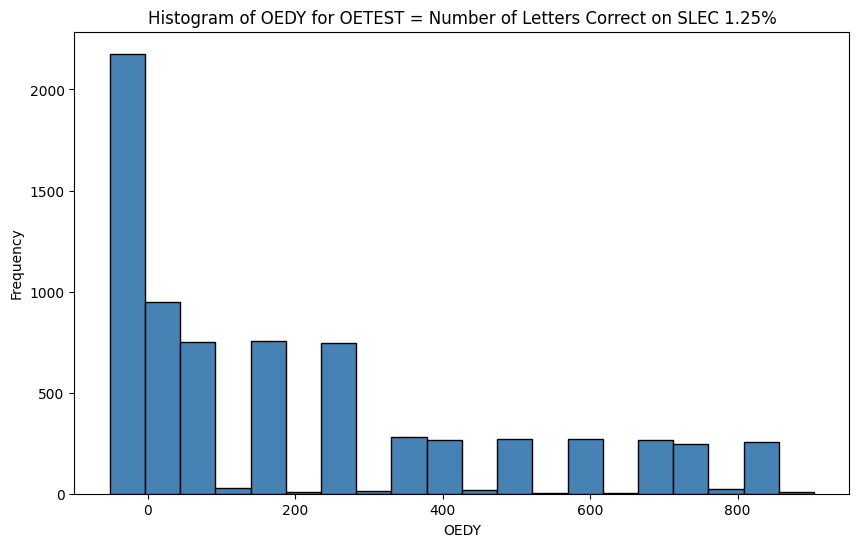

In [174]:
plt.figure(figsize=(10, 6))
plt.hist(SLEC_B['OEDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('OEDY')
plt.ylabel('Frequency')
plt.title('Histogram of OEDY for OETEST = Number of Letters Correct on SLEC 1.25%')
plt.show()

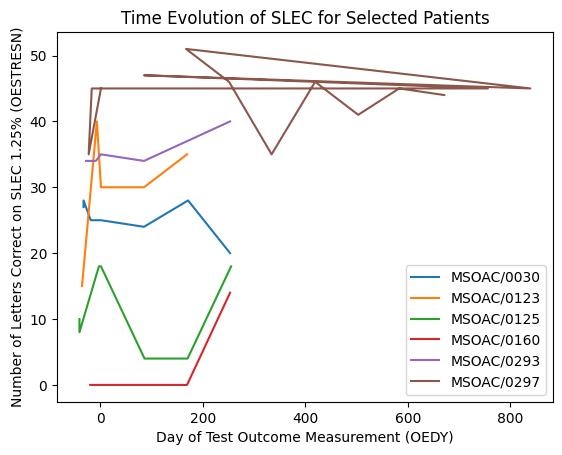

In [179]:
# Select a few patients (replace 'selected_patients' with the actual USUBJID values you are interested in)
selected_patients = ['MSOAC/0030', 'MSOAC/0123', 'MSOAC/0125', 'MSOAC/0160', 'MSOAC/0293', 'MSOAC/0297']
filtered_opt = SLEC_B[(SLEC_B['USUBJID'].isin(selected_patients))]

# Plot the time evolution for selected patients
for patient_id in selected_patients:
    patient_data = filtered_opt[filtered_opt['USUBJID'] == patient_id]
    plt.plot(patient_data['OEDY'], patient_data['OESTRESN'])

# Customize the plot
plt.xlabel('Day of Test Outcome Measurement (OEDY)')
plt.ylabel('Number of Letters Correct on SLEC 1.25% (OESTRESN)')
plt.title('Time Evolution of SLEC for Selected Patients')
plt.legend(selected_patients)
plt.show()

In [148]:
# Mapping OELAT values to desired names
oelat_mapping = {'LEFT': 'L', 'RIGHT': 'R', 'BILATERAL': 'B'}
SLEC_rows['OELAT'] = SLEC_rows['OELAT'].map(oelat_mapping)

# Mapping OEMETHOD value to desired abbreviation
SLEC_rows['OEMETHOD'] = '1.25%'

# Calculate the median of OESTRESN for each unique USUBJID, OELAT, and OEMETHOD
result_SLEC = SLEC_rows.pivot_table(index='USUBJID', columns=['OELAT', 'OEMETHOD'], values='OESTRESN', aggfunc='min').reset_index()

# Rename the columns
result_SLEC.columns = ['USUBJID'] + [f'SLEC_{numeric_oemethod}_{oelat}' for oelat, numeric_oemethod in result_SLEC.columns[1:]]
result_SLEC.head(50)

,USUBJID,SLEC_1.25%_B,SLEC_1.25%_L,SLEC_1.25%_R
0,MSOAC/0014,9.0,7.0,7.0
1,MSOAC/0030,20.0,NaN,NaN
2,MSOAC/0031,4.0,NaN,NaN
3,MSOAC/0046,13.0,NaN,NaN
4,MSOAC/0050,28.0,NaN,NaN
5,MSOAC/0060,13.0,NaN,NaN
6,MSOAC/0061,0.0,0.0,0.0
7,MSOAC/0063,3.0,NaN,NaN
8,MSOAC/0065,10.0,NaN,NaN
9,MSOAC/0070,22.0,NaN,NaN


based on this make a split on the uni and bilateral maybe because it seems unfair to compare bilaterial with the others because it will always go from 15 to 0 or 8 to 1 etc it will drop A LOT and will become "outliers" (because much more data for bilateral)

#### Visual Acuity Assessment (VAA)

should I also keep track if this was in the left or right eye? this one might not even be that important -- create binary indicator 1 if abnormal anywhere 0 if normal everywhere

In [180]:
VAA_rows = opt[opt['OETEST'] == 'Visual Acuity Assessment']

outcome_measure_counts = VAA_rows.groupby(['OETEST', 'USUBJID', 'OELAT']).size().reset_index(name='Observation_Count')
outcome_measure_counts.groupby(['OETEST', 'OELAT'])['Observation_Count'].describe()

count      mean       std  min  25%   50%  \
OETEST                   OELAT                                              
Visual Acuity Assessment LEFT   773.0  9.743855  3.889218  1.0  6.0  11.0   
                         RIGHT  773.0  9.743855  3.889218  1.0  6.0  11.0   

                                 75%   max  
OETEST                   OELAT              
Visual Acuity Assessment LEFT   13.0  18.0  
                         RIGHT  13.0  18.0

In [184]:
# Group by 'USUBJID' and check if 'ABNORMAL' is present in any measurement for each patient
result_VAA = VAA_rows.groupby('USUBJID')['OESTRESC'].apply(lambda x: 1 if 'ABNORMAL' in x.values else 0).reset_index()

# Rename the columns
result_VAA.columns = ['USUBJID', 'VAA']

result_VAA.head()

,USUBJID,VAA
0,MSOAC/0014,0
1,MSOAC/0034,0
2,MSOAC/0035,1
3,MSOAC/0044,0
4,MSOAC/0051,1


In [185]:
# Count the occurrences of 1s and 0s in the 'VAA' column
count_vaa = result_VAA['VAA'].value_counts()

# Display the counts
print(count_vaa)

VAA
0    592
1    181
Name: count, dtype: int64


### Merge into a static dataframe

In [186]:
# Extract unique USUBJID values from the opt DataFrame
unique_usubjid = opt['USUBJID'].unique()

# Initialize an empty DataFrame with the unique USUBJID values
final_merged_df = pd.DataFrame({'USUBJID': unique_usubjid})

# List of result DataFrames
result_dfs = [result_DC, result_SLEC, result_SES, result_VAA]

# Iterate through result DataFrames and perform left merges
for result_df in result_dfs:
    final_merged_df = pd.merge(final_merged_df, result_df, on='USUBJID', how='left')

final_merged_df

,USUBJID,DS,DS_L,DS_R,SLEC_1.25%_B,SLEC_1.25%_L,SLEC_1.25%_R,SES_after,SES_before,VAA
0,MSOAC/0014,NaN,NaN,NaN,9.0,7.0,7.0,NaN,NaN,0.0
1,MSOAC/0030,NaN,NaN,NaN,20.0,NaN,NaN,6.0,4.8,NaN
2,MSOAC/0031,NaN,NaN,NaN,4.0,NaN,NaN,6.0,7.5,NaN
3,MSOAC/0034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,MSOAC/0035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
1559,MSOAC/9980,NaN,NaN,NaN,17.0,NaN,NaN,4.8,4.8,NaN
1560,MSOAC/9986,NaN,NaN,NaN,31.0,NaN,NaN,4.8,4.8,NaN
1561,MSOAC/9987,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0
1562,MSOAC/9995,1.2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0


Only 1564 rows instead of 2465 because not all patients are in this dataset as mentioned in the beginning!

In [150]:
# Calculate the percentage of missing values for each column
missing_percentage = final_merged_df.isnull().mean() * 100

# Sort the values from high to low
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
print(missing_percentage_sorted)

DS              80.179028
DS_L            80.179028
DS_R            80.179028
SLEC_1.25%_L    78.005115
SLEC_1.25%_R    78.005115
SES_before      49.424552
SES_after       49.424552
SLEC_1.25%_B    27.429668
USUBJID          0.000000
dtype: float64
